# Problem Set 03 - Chem 272
## More About Lennard Jones
<br>

**1) Motivation**

In order to prepare you for the final project and also for practicing writing code for simulations, we want to work more on the Lennard-Jones potential $\Phi$. In the lecture exercise, you calculated $\Phi$ for the one-dimensional case with just one variable $r_{ij}$ which was the distance between two particles $i$ and $j$.<br>
Now, we want to perform two more steps:<br>
**First** we want to calculate the Lennard-Jones potential<br>
<br>
$\Phi = \frac{a}{r^{12}} - \frac{b}{r^6}$<br>
<br>
for two dimensions $r_{ij}^2 = (x_i - x_j)^2 + (y_i - y_j)^2$<br>
and **second**, we want to calculate the **total** potential, each particle feels! 

<br>

**2) Preparation**

We generate initial values of the coordinates $x$ and $y$ for $N$ particles randomly:

In [4]:
import numpy as np

N = 100
Xinit = np.random.uniform(2,10,(N,))
Yinit = np.random.uniform(2,10,(N,))

a = 1
b = 1

Dx = np.tile(Xinit, (N,1)) - np.tile(Xinit, (N,1)).T
Dy = np.tile(Yinit, (N,1)) - np.tile(Yinit, (N,1)).T

r_squared = Dx**2 + Dy**2

np.fill_diagonal(r_squared, 1)

Phi = a / r_squared**6 - b / r_squared**3
Phi = Phi * (1 - np.eye(N))

Phi

array([[ 0.00000000e+00, -2.94484712e-05, -3.79904367e-03, ...,
        -3.21403191e-04, -8.28924296e-05, -2.51634610e-04],
       [-2.94484712e-05,  0.00000000e+00, -1.25459046e-04, ...,
        -9.77973575e-05, -1.05227516e-03, -2.04337124e-04],
       [-3.79904367e-03, -1.25459046e-04,  0.00000000e+00, ...,
        -1.52419460e-01, -4.56835328e-03, -9.31851899e-02],
       ...,
       [-3.21403191e-04, -9.77973575e-05, -1.52419460e-01, ...,
         0.00000000e+00, -2.53161623e-02,  7.92156531e+02],
       [-8.28924296e-05, -1.05227516e-03, -4.56835328e-03, ...,
        -2.53161623e-02,  0.00000000e+00, -1.78584778e-01],
       [-2.51634610e-04, -2.04337124e-04, -9.31851899e-02, ...,
         7.92156531e+02, -1.78584778e-01,  0.00000000e+00]])

Calculate the distance matrices $Dx$ and $Dy$ using $np.tile$. You can now calculate the Matrix for the Lennard-Jones potential $\Phi$. Note that $\Phi$ is an $N\times N$ matrix. The value $\Phi[i,j]$ equals the potential particle $i$ feels from particle $j$. Make sure to avoid $\Phi[i,j] = \infty$ for $i=j$ by using $np.eye$! 

<br>

**3) Exercise**

3a) Now, calculate the total potential $U_{tot}$ each particle feels as a sum from the potential of all the other particles! That should return a vector $U_{tot}$ of length $N$. Use $np.dot$ and $np.ones$ in order to avoid loops! Set $a=1$ and $b=1$.

3b) Write a function using $def$ that performs the following steps:<br>
- it suggests small moves $\Delta x = \pm 0.01$ and $\Delta y =  \pm 0.01$ with respect to Xinit and Yinit<br>
- it calculates how $U_{tot}$ would change, if the particles were to perform these moves (check out $np.argwhere$!).<br>
- **only** those particles for which $U_{tot}$ **decreases** are allowed to move<br>
- it plots a histogram of $U_{tot}$<br>
- it repeats this process for 1000 iterations. Plot the histogram only for each 100th iteration

Hint: It is more practical to define a function that calculates $U_{tot}$ from the vectors $X$ and $Y$ first and to make sure that this function works. In a second step, this function will be called each time you need to perform such a calculation.<br>
Your histograms should look like this:<br>
<br>
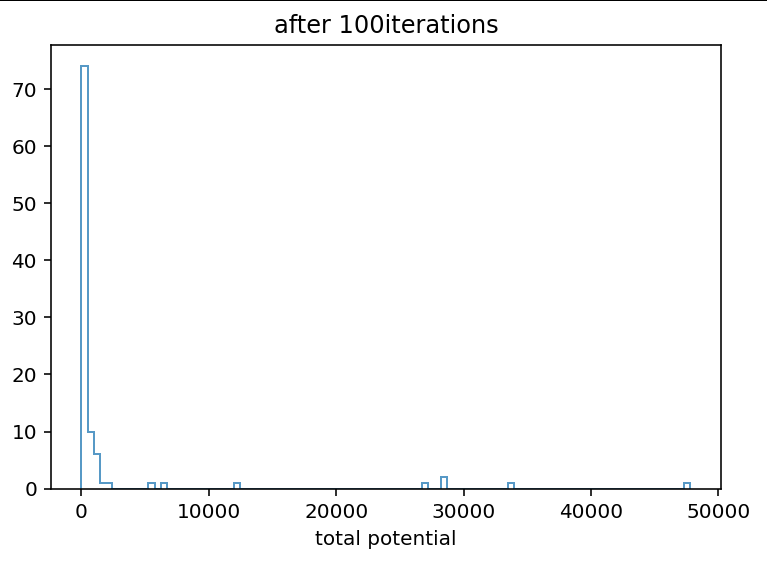
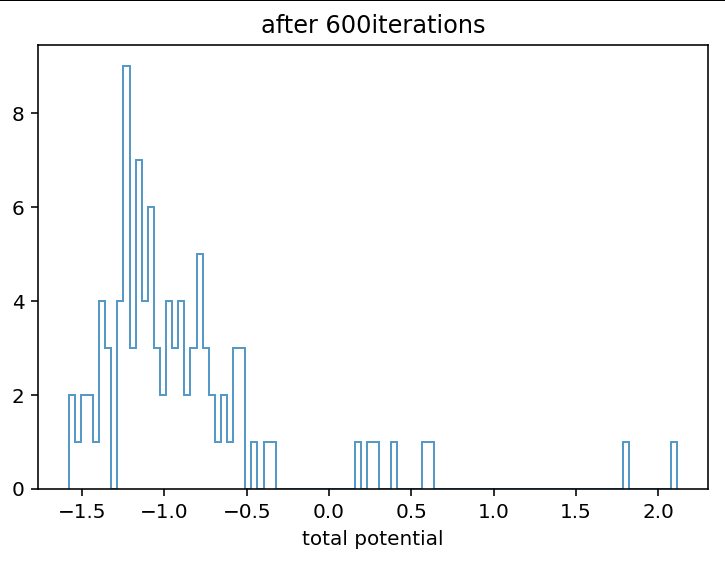
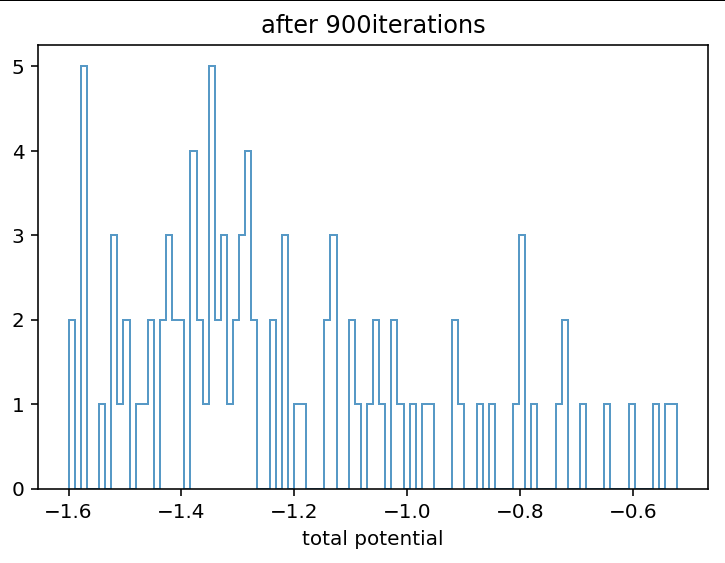

You can start with the following code:

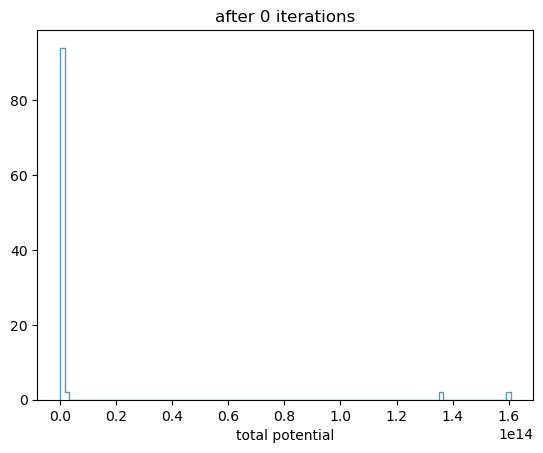

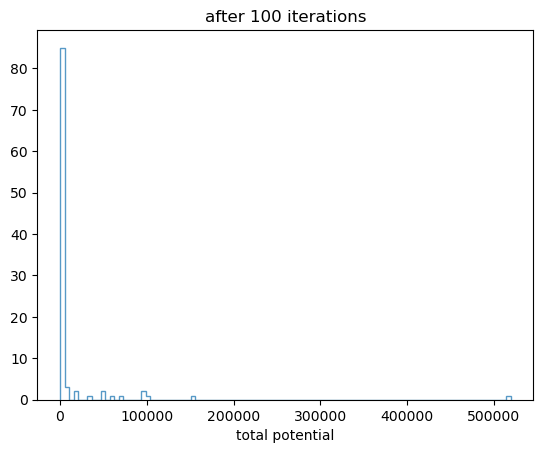

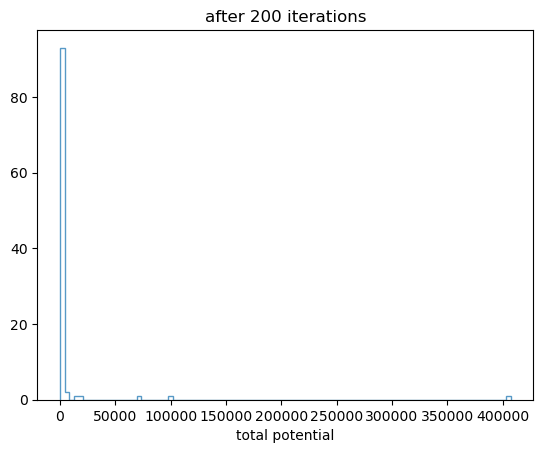

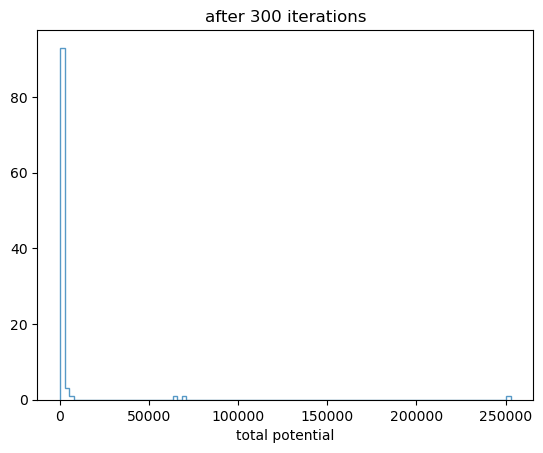

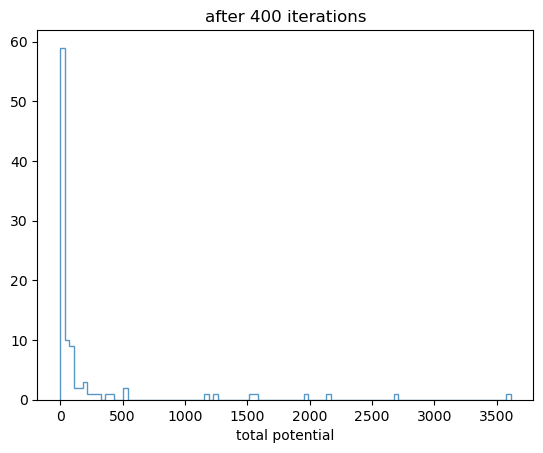

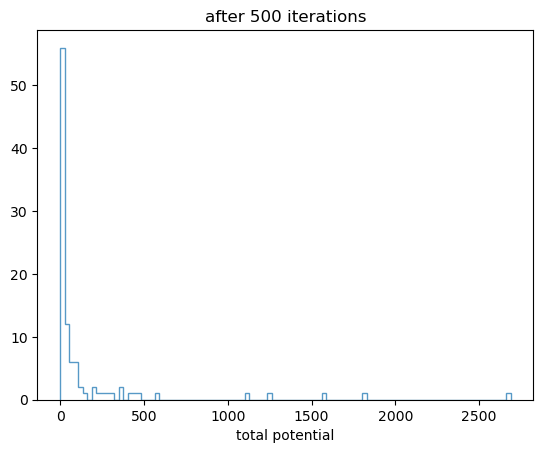

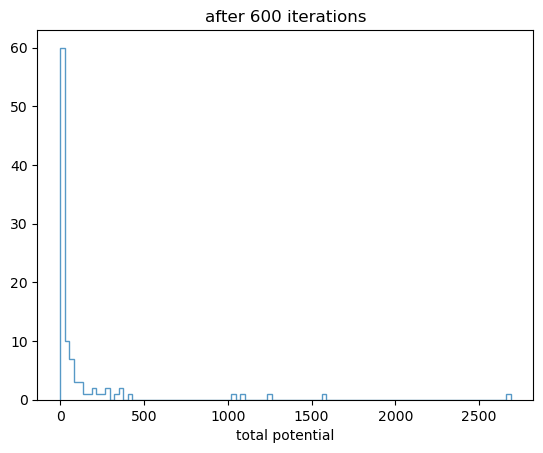

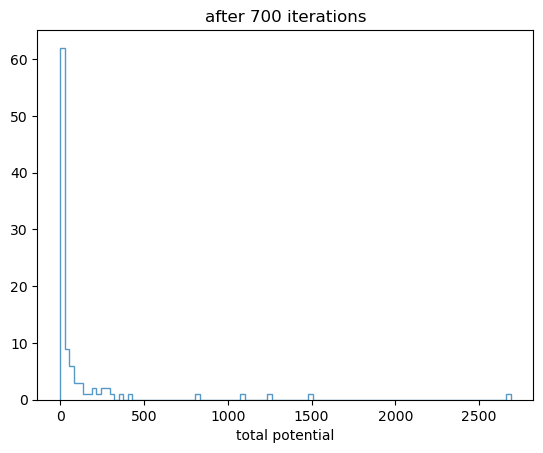

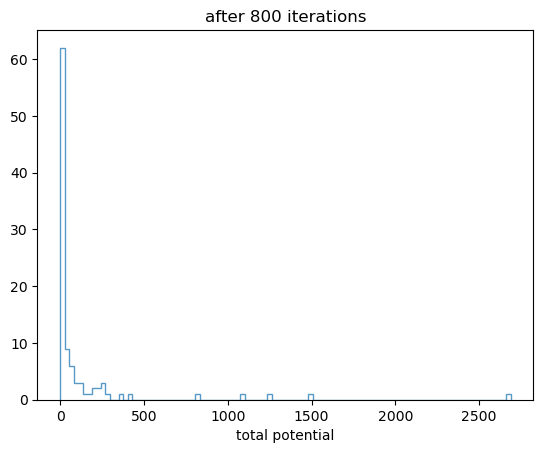

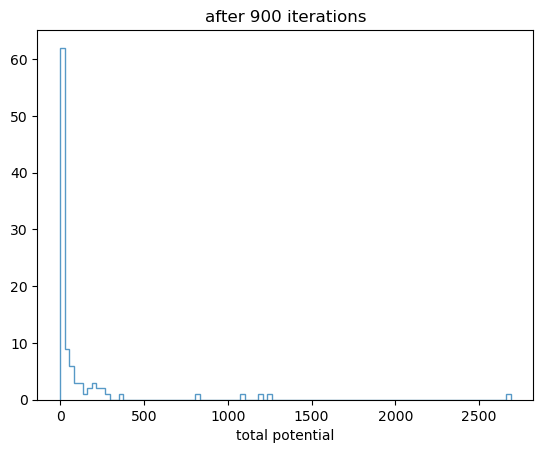

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def CoordsToPotential(Xin, Yin, a, b, N, Eye, Ones):
    
    X      = np.tile(Xin, (N,1))
    Y      = np.tile(Yin, (N,1))
    
    Dx     = X - X.transpose()
    Dy     = Y - Y.transpose()
    
    r_squared = Dx**2 + Dy**2
    np.fill_diagonal(r_squared, 1.0)

    Phi = a / r_squared**6 - b / r_squared**3
    Phi = Phi * (1 - Eye)

    Utot = np.dot(Phi, Ones)
    
    return Utot

def Utot_Move_Particle(Niter: int = 1000, N: int = 100, a: float = 1, b: float = 1):
    
    Eye  = np.eye(N)
    Ones = np.ones((N,))

    Xinit = np.random.uniform(0,10,(N,))
    Yinit = np.random.uniform(0,10,(N,))
    
    Utot  = CoordsToPotential(Xinit, Yinit, a, b, N, Eye, Ones)
    
    for n in range(Niter):
        
        dx = 0.01* np.random.choice([-1, 1],(N,))
        dy = 0.01* np.random.choice([-1, 1],(N,))
        
        Xnew = Xinit + dx
        Ynew = Yinit + dy
        
        Utot_new = CoordsToPotential(Xnew, Ynew, a, b, N, Eye, Ones)
        
        improved = Utot_new < Utot
        Xinit[improved] = Xnew[improved]
        Yinit[improved] = Ynew[improved]
        Utot[improved] = Utot_new[improved]
        
        if not n%100:
            
            plt.hist(Utot, N, density = False, histtype = 'step', facecolor = 'g',
               alpha = 0.75)
            plt.xlabel('total potential')
            plt.title('after ' + str(n) + ' iterations')
            plt.show()
            
Utot_Move_Particle()